# Practical Guide To Linear Regression

### (MetaData of the NoteBook): Statistics and Machinelearning is not just forking and pasting some algorithms to get a job.

### `I strongly believe by understanding these concepts clearly anyone can master the topics. Hence I tried to aggregate all the relevent information under these Notebooks. And gives it a nice R&D development touch and tried to build a scalable Engineering solution out of the Notebook.`
I hope you will enjoy the notebook. 
<br>
[Satyajit Maitra](https://www.linkedin.com/in/satyajit-maitra-b51b58150/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression
In linear regression we will require 2 set of variables. One is the dependent variable(termed as $\widehat{y}$) and second the independent variable(termed as $\widehat{x}$). Mostly the task relies upon correctly predicting the $\widehat{y}$ with the help of a combination of $\widehat{x}$.

Typically, a regression analysis is used for one (or more) of three purposes: 
1. modeling the relationship between x and y;
2. prediction of the target variable (forecasting); 
3. and testing of hypotheses.   *taken from [here](http://docentes.uto.edu.bo/jzamoranoe/wp-content/uploads/Chatterjee2013_Regresion.pdf)*



# The Model
The data consist of n sets of observations ${x_{1i}, x_{2i},..., x_{ni}, y_{i}}$, which represent a random sample from a larger population. It is assumed that these
observations satisfy a linear relationship,
$$ y_{i} = \beta_{0} + \beta_{1}{x_{1i}+ \beta_{1}{x_{1i}+ \varepsilon _{i} $$


It is important to recognize that this, or any statistical model, is not
viewed as a true representation of reality; rather, the goal is that the model
be a useful representation of reality. A model can be used to explore the relationships between variables and make accurate forecasts based on those relationships even if it is not the "truth." 

Further, any statistical model is only
temporary, representing a provisional version of views about the random process being studied. Models can, and should, change, based on analysis using
the current model, selection among several candidate models.

In [2]:
df = pd.read_csv("../input/uber-and-lyft-dataset-boston-ma/rideshare_kaggle.csv")
df.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...             0.1276  1544979600           39.89   
1     Lyft  ...             0.1300  1543251600           40.49   
2     Lyft  ...             0.1064  1543338000           35.36   
3     Lyft  ...             0.0000  1543507200           34.67   
4     Lyft  ...             0.0001  1543420800           33.10   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1545012000           43.68          1544968800   
1          1543233600           47.30          1543251600   
2          1543377600           47.55          1543320000   
3          1543550400           45.03          1543510800   
4          1543402800           42.18          1543420800   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   33.73                  1545012000                   38.07   
1                   36.20                  1543291200                   43.92   
2                   31.04                  1543377600                   44.12   
3                   30.30                  1543550400                   38.53   
4                   29.11                  1543392000                   35.75   

  apparentTemperatureMaxTime  
0                 1544958000  
1                 1543251600  
2                 1543320000  
3                 1543510800  
4                 1543420800  

[5 rows x 57 columns]

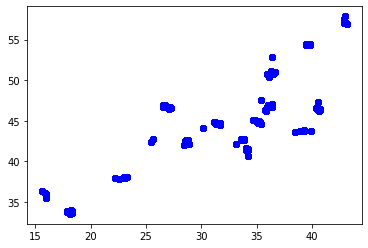

In [3]:
x = df["temperatureMin"]
y = df["temperatureMax"]
plt.scatter(x, y, c ="blue")
plt.show()

This data here is only a snapshot in time. The data might and will change with time so statistics is not truth rather it is a random process being studied.

# ESTIMATION USING LEAST SQUARES
The true regression function represents the expected relationship between the
target and the predictor variables, which is unknown. A primary goal of a
regression analysis is to estimate this relationship, or equivalently, to estimate
the unknown parameters $\beta$. This requires a data-based rule, or criterion,
that will give a reasonable estimate.

The target of least-square method is to minimize this fucntion:
> 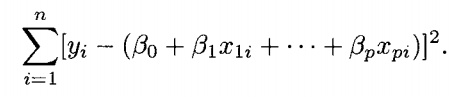
The difference between the fitted and actual value is termed as residual.

Analytically the solution for the regression coefficient can be found from this equation:
> 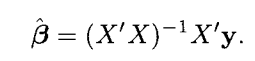

It implise that our Hypothesis for analytical approach of linear regression:
> 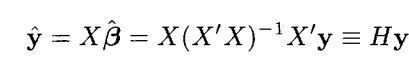

Now to be able to use certain analytical approach into linear regression we do have to follow certian assumptions :
> 1. The expected value of the errors is zero (E{ei) — 0 for all i). That is, it
cannot be true that for certain observations the model is systematically
too low, while for others it is systematically too high. A violation of this
assumption will lead to difficulties in estimating $\beta$

> 2. The variance of the errors is constant (V(ei) = $\sigma^2$
 for all i). That is,
it cannot be true that the strength of the model is more for some parts
of the population (smaller $\sigma$) and less for other parts (larger $\sigma$). This
assumption of constant variance is called **homoscedasticity**, and its violation (nonconstant variance) is called **heteroscedasticity**. A violation of
this assumption means that the least squares estimates are not as efficient
as they could be in estimating the true parameters, and better estimates
are available.

> 3. The errors are normally distributed. This is needed if we want to construct any confidence or prediction intervals, or hypothesis tests, which we usually do. If this assumption is violated, hypothesis tests and confidence and prediction intervals can be very misleading. 

> 4. The errors are uncorrelated with each other. That is, it cannot be true
that knowing that the model underpredicts y (for example) for one particular observation says anything at all about what it does for any other observation. This violation most often occurs in data that are ordered in
time (time series data), where errors that are near each other in time are
often similar to each other (such time-related correlation is called autocorrelation). Violation of this assumption can lead to very misleading
assessments of the strength of the regression.

# Important Note About Regression
* The word **associated** — we cannot say that a change in the target variable is caused by a change in the predictor, only that they are associated with each other. That is, correlation does not imply causation.

* The regression coefficient does not say anything about that marginal relationship. That means we can have an equation where your expendeture increases with your income. But it is certainly not so. If interested in relationship with target and specific variable. Run regression alone with the variable.
 

# Different Terms

## $R^2$ (coefficient of determination)
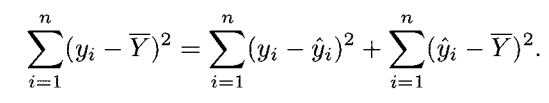

This equation above said that the variability in target can be analyzed by regression in two mutually exclusive terms. 
* One part is the variability of leftover of regression analysis.
* The other part is the variability included in regression. 

This equation suggests the importance of $R^2$ analysis.
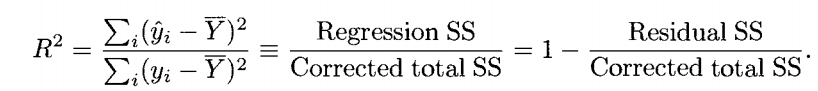

It estimates the population proportion of variability in y accounted for by the best linear combination of the predictors. Values closer to 1 indicate a good deal of predictive
power of the predictors for the target variable, while values closer to 0 indicate
little predictive power. 

It simply measures the corelation between the predicted value and the actual value.

One word of causion Adding more independent variables or predictors to a regression model tends to increase the R-squared value, which tempts makers of the model to add even more variables. This is called overfitting and can return an unwarranted high R-squared value. **Adjusted R-squared** is used to determine how reliable the correlation is and how much it is determined by the addition of independent variables.
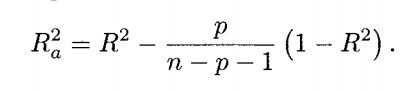

It suggest that unless the p value is too high. both are going to be more or less same. **Adjusted R-squared** is a trade-off between  the complexity of the model and  the strength of the fit.

The only parameter left unaccounted for in the estimation scheme is the variance of the errors $\sigma^2$. An unbiased estimate is provided by the residual mean square,
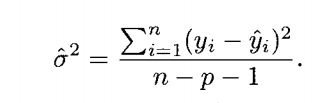

Recallingh that $\sigma$ will be normally distributed. This means that, roughly speaking, 95% of the time an observed y value falls within ±2$\sigma$ of the expected response.


# HYPOTHESIS TESTS
There are two types of hypothesis tests related to the regression coefficients
of immediate interest.
1. Do any of the predictors provide predictive power for the target variable? This is a test of the overall significance of the regression,
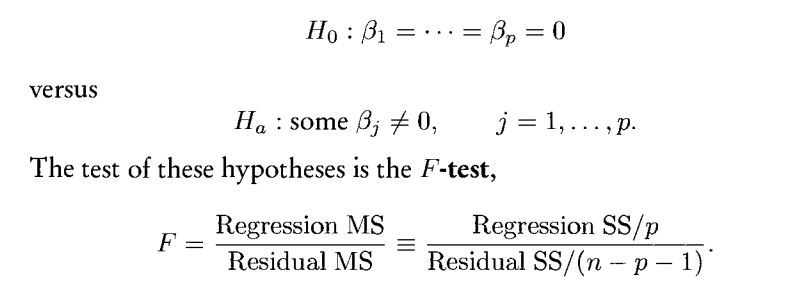

2. Given the other variables in the model, does a particular predictor provide additional predictive power? This corresponds to a test of the significance of an individual coefficient, 
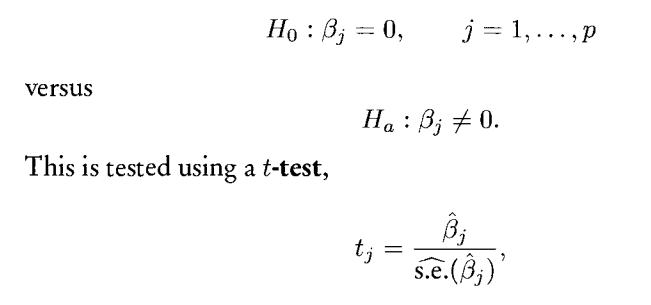


#  CHECKING ASSUMPTIONS USING RESIDUAL PLOTS

1. A plot of the **residuals versus the fitted values**. This plot should have no pattern to it; that is, no structure should be apparent. Certain kinds of structure indicate potential problems:
>(a) A point (or a few points) isolated at the top or bottom, or left or right. In addition, often the rest of the points have a noticeable "tilt" to them.These isolated points are unusual points, and can have a strong effect on the regression. They need to be examined carefully, and possibly
removed from the data set.<br>
>(b) An impression of different heights of the point cloud as the plot is examined from left to right. This indicates potential heteroscedasticity (nonconstant variance). 

2. Plots of the residuals versus each of the predictors. Again, a plot with no apparent structure is desired. 

3. If the data set has a time structure to it, residuals should be plotted versus time. Again, there should be no apparent pattern. If there is a cyclical structure, this indicates that the errors are not uncorrelated, as they are supposed to be (that is, there is potentially autocorrelation in the errors). 

4. A normal plot of the residuals. This plot assesses the apparent normality of the residuals, by plotting the observed ordered residuals on one axis and the expected positions (under normality) of those ordered residuals on the other. The plot should look like a straight line (roughly). Isolated points once again represent unusual observations, while a curved line indicates that the errors are probably not normally distributed, and tests and intervals might not be trustworthy. 


# Coding Problem -1 

Test the Understanding

* predicting Maxtemperature from Min temperature values. To see if they are correlative.

In [4]:
from sklearn.linear_model import LinearRegression
X= np.array(df["temperatureMin"]).reshape(-1, 1)
y= df["temperatureMax"]
reg = LinearRegression().fit(X, y)
reg

LinearRegression()

## Check the $R^2$

In [5]:
reg.score(X,y)

0.6130034231962934

## Meaning of $R^2$
If R² is high (say 1), then the model represents the variance of the dependent variable.
If R² is very low, then the model does not represent the variance of the dependent variable and regression is no better than taking the mean value, i.e. you are not using any information from the other variables.
A Negative R² means you are doing worse than the mean value. It can have a negative value if the predictors do not explain the dependent variables at all such that RSS ~ TSS.

Our predictor is 60% accurate in understanding the target. 

In [6]:
reg.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [7]:
reg.predict(np.array([32]).reshape(-1,1))

array([44.26505619])

# Model Building
1. Including unnecessary predictors in the model (what is sometimes called overfitting) complicates descriptions of the process. Using such models tends to lead to poorer predictions because of the additional unnecessary noise. Further, a more complex representation of the true regression relationship is less likely to remain stable enough to be useful for future prediction than is a simpler one. 

2. . Omitting important effects (underfitting) reduces predictive power, biases estimates of effects for included predictors, and results in less understanding of the process being studied. 

3. Violations of assumptions should be addressed, so that least squares estimation is justified.

# Different Hypothesis

A predictor that does not add significantly to model fit should have an estimated slope coefficient that is not significantly different from 0, and is thus identified by a small t-statistic. t-statistics are not effective in identifying important predictors when the two variables are highly correlated.

Colinearity is measureds with F-statistics The F-statistic has the form
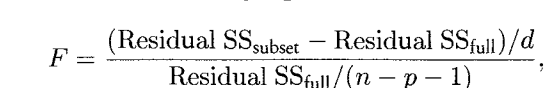

A related issue is that of
collinearity (sometimes somewhat redundantly referred to as multicollinearity), which refers to the situation when (some of) the predictors are highly
correlated with each other. Predicting variables that are highly correlated
with each other can lead to instability in the regression coefficients, and as
a result the t-statistics for the variables can be deflated. 

Note that while collinearity can have a
large effect on regression coefficients and associated t-statistics, it does not
have a large effect on overall measures of fit like the overall F-test or R2.

Solution to this is, A diagnostic to determine this in general is the variance inflation factor
(VIF) for each predicting variable.
There are two terms important related to model selection.
AIC and BIC choose the one with minimum value.

A final way of comparing models is from a directly predictive point of
view. Since a rough 95% prediction interval is ±2$\sigma$, a useful model from a
predictive point of view is one with small $\sigma$, suggesting choosing a model that
has small a while still being as simple as possible.

# Important terms:
* Cook's distance D is also equivalent to the change in the predicted values from the full data and the fitted value obtained by deleting the observation of outlier.
* masking effect: This occurs when several unusual observations are all in the same region of the (X, y) space. When this happens, the diagnostics, which all focus on changes in the regression when a single point is deleted, fail, since the presence of the other nearby unusual observations means that the fitted regression changes very little if one is omitted.

* One benefit of taking logs of the response variable is that it can address certain kinds of heteroscedasticity. A situation where the variability of the response variable reflects multiplicative, rather than additive errors, can be accommodated by taking logs. Consider a true relationship that has the form 

# Dealing With Categorical Variable to predict Continous Variable
this is a
question of the comparison of means.
we focus on models with
only categorical predictors, which are termed analysis of variance (ANOVA)
models.

# Mean Squared Error (MSE)
The most common metric for regression tasks is MSE. It has a convex shape. It is the average of the squared difference between the predicted and actual value. Since it is differentiable and has a convex shape, it is easier to optimize.
MSE penalizes large errors.

# Mean Absolute Error (MAE)
This is simply the average of the absolute difference between the target value and the value predicted by the model. Not preferred in cases where outliers are prominent.
MAE does not penalize large errors.

# Analysis Of data 
## sklearen framework

In [8]:
pd. get_option("display.max_columns")
df.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...             0.1276  1544979600           39.89   
1     Lyft  ...             0.1300  1543251600           40.49   
2     Lyft  ...             0.1064  1543338000           35.36   
3     Lyft  ...             0.0000  1543507200           34.67   
4     Lyft  ...             0.0001  1543420800           33.10   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1545012000           43.68          1544968800   
1          1543233600           47.30          1543251600   
2          1543377600           47.55          1543320000   
3          1543550400           45.03          1543510800   
4          1543402800           42.18          1543420800   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   33.73                  1545012000                   38.07   
1                   36.20                  1543291200                   43.92   
2                   31.04                  1543377600                   44.12   
3                   30.30                  1543550400                   38.53   
4                   29.11                  1543392000                   35.75   

  apparentTemperatureMaxTime  
0                 1544958000  
1                 1543251600  
2                 1543320000  
3                 1543510800  
4                 1543420800  

[5 rows x 57 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [10]:
df.describe()

timestamp           hour            day          month  \
count  6.930710e+05  693071.000000  693071.000000  693071.000000   
mean   1.544046e+09      11.619137      17.794365      11.586684   
std    6.891925e+05       6.948114       9.982286       0.492429   
min    1.543204e+09       0.000000       1.000000      11.000000   
25%    1.543444e+09       6.000000      13.000000      11.000000   
50%    1.543737e+09      12.000000      17.000000      12.000000   
75%    1.544828e+09      18.000000      28.000000      12.000000   
max    1.545161e+09      23.000000      30.000000      12.000000   

               price       distance  surge_multiplier       latitude  \
count  637976.000000  693071.000000     693071.000000  693071.000000   
mean       16.545125       2.189430          1.013870      42.338172   
std         9.324359       1.138937          0.091641       0.047840   
min         2.500000       0.020000          1.000000      42.214800   
25%         9.000000       1.280000          1.000000      42.350300   
50%        13.500000       2.160000          1.000000      42.351900   
75%        22.500000       2.920000          1.000000      42.364700   
max        97.500000       7.860000          3.000000      42.366100   

           longitude    temperature  ...  precipIntensityMax   uvIndexTime  \
count  693071.000000  693071.000000  ...       693071.000000  6.930710e+05   
mean      -71.066151      39.584388  ...            0.037374  1.544044e+09   
std         0.020302       6.726084  ...            0.055214  6.912028e+05   
min       -71.105400      18.910000  ...            0.000000  1.543162e+09   
25%       -71.081000      36.450000  ...            0.000000  1.543421e+09   
50%       -71.063100      40.490000  ...            0.000400  1.543770e+09   
75%       -71.054200      43.580000  ...            0.091600  1.544807e+09   
max       -71.033000      57.220000  ...            0.145900  1.545152e+09   

       temperatureMin  temperatureMinTime  temperatureMax  temperatureMaxTime  \
count   693071.000000        6.930710e+05   693071.000000        6.930710e+05   
mean        33.457774        1.544042e+09       45.261313        1.544047e+09   
std          6.467224        6.901954e+05        5.645046        6.901353e+05   
min         15.630000        1.543122e+09       33.510000        1.543154e+09   
25%         30.170000        1.543399e+09       42.570000        1.543439e+09   
50%         34.240000        1.543727e+09       44.680000        1.543788e+09   
75%         38.880000        1.544789e+09       46.910000        1.544814e+09   
max         43.100000        1.545192e+09       57.870000        1.545109e+09   

       apparentTemperatureMin  apparentTemperatureMinTime  \
count           693071.000000                6.930710e+05   
mean                29.731002                1.544048e+09   
std                  7.110494                6.871862e+05   
min                 11.810000                1.543136e+09   
25%                 27.760000                1.543399e+09   
50%                 30.130000                1.543745e+09   
75%                 35.710000                1.544789e+09   
max                 40.050000                1.545134e+09   

       apparentTemperatureMax  apparentTemperatureMaxTime  
count           693071.000000                6.930710e+05  
mean                41.997343                1.544048e+09  
std                  6.936841                6.910777e+05  
min                 28.950000                1.543187e+09  
25%                 36.570000                1.543439e+09  
50%                 40.950000                1.543788e+09  
75%                 44.120000                1.544818e+09  
max                 57.200000                1.545109e+09  

[8 rows x 46 columns]

so there are almost 46 columns with numerical value we will hand-picked a few to explain a regression model to predict **price**.

In [11]:
columns = ["id","month","day","hour","distance","surge_multiplier","cab_type","latitude","longitude","temperature","precipIntensity","precipProbability","humidity","windSpeed","windGust","dewPoint","pressure","ozone","price"]
analysis_df = df[columns]

In [12]:
analysis_df.head()

id  month  day  hour  distance  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7     12   16     9      0.44   
1  4bd23055-6827-41c6-b23b-3c491f24e74d     11   27     2      0.44   
2  981a3613-77af-4620-a42a-0c0866077d1e     11   28     1      0.44   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512     11   30     4      0.44   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a     11   29     3      0.44   

   surge_multiplier cab_type  latitude  longitude  temperature  \
0               1.0     Lyft   42.2148    -71.033        42.34   
1               1.0     Lyft   42.2148    -71.033        43.58   
2               1.0     Lyft   42.2148    -71.033        38.33   
3               1.0     Lyft   42.2148    -71.033        34.38   
4               1.0     Lyft   42.2148    -71.033        37.44   

   precipIntensity  precipProbability  humidity  windSpeed  windGust  \
0           0.0000                0.0      0.68       8.66      9.17   
1           0.1299                1.0      0.94      11.98     11.98   
2           0.0000                0.0      0.75       7.33      7.33   
3           0.0000                0.0      0.73       5.28      5.28   
4           0.0000                0.0      0.70       9.14      9.14   

   dewPoint  pressure  ozone  price  
0     32.70   1021.98  303.8    5.0  
1     41.83   1003.97  291.1   11.0  
2     31.10    992.28  315.7    7.0  
3     26.64   1013.73  291.1   26.0  
4     28.61    998.36  347.7    9.0

Though this notebook is all about linear regression and i have choosen only the numeric variable (ordinal and ratio) as independent variables. Still we are going to plot some graphs to analyze the data better. 

## Visualization
### 1. Time Trend Analysis

In [13]:
! pip install chart_studio

     |████████████████████████████████| 64 kB 1.1 MB/s 


In [14]:
import plotly.express as px

In [15]:
df =analysis_df.groupby(by=["month"]).size().reset_index(name="counts")
df

month  counts
0     11  286457
1     12  406614

In [16]:
px.bar(data_frame=df, x="month", y="counts", color="month", barmode="group")

In [17]:
df =analysis_df.groupby(by=["day"]).size().reset_index(name="counts")
df

day  counts
0     1   45240
1     2   44928
2     3   44928
3     4   12636
4     9    1674
5    10    2773
6    13   38531
7    14   44928
8    15   44928
9    16   44928
10   17   44928
11   18   36192
12   26   31587
13   27   76121
14   28   73691
15   29   59974
16   30   45084

In [18]:
px.bar(data_frame=df, x="day", y="counts", color="day", barmode="group")

Wow, we don't have any booking data for almost 12 days. It might be due to some reasons or the dataset we are working with is randomized in these way to deal with. 

so we have more orders in the month of december. good . Now let us move to visualize the pattern of order per day basis. 

In [19]:
df =analysis_df.groupby(by=["hour"]).size().reset_index(name="counts")
px.bar(data_frame=df, x="hour", y="counts", color="hour", barmode="group")

It is more or less uniform. Now analyze the same with uber/Lyft to see the market cap of both the companies for this time period.

In [20]:
df =analysis_df.groupby(by=["month","cab_type"]).size().reset_index(name="counts")
px.bar(data_frame=df, x="month", y="counts", color="cab_type", barmode="group")

In [21]:
df =analysis_df.groupby(by=["day","cab_type"]).size().reset_index(name="counts")
px.bar(data_frame=df, x="day", y="counts", color="cab_type", barmode="group")

In [22]:
df =analysis_df.groupby(by=["hour","cab_type"]).size().reset_index(name="counts")
px.bar(data_frame=df, x="hour", y="counts", color="cab_type", barmode="group")

So one thing is very clear in this aspet that uber is far ahead of lyft in getting orders in all aspects of time.

## Geolocation Analysis

In [23]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap

In [24]:
# plt.figure(figsize=(8, 8))
# m = Basemap(projection='ortho', resolution=None, lat_0=analysis_df["latitude"].mean(), lon_0=analysis_df["longitude"].mean())
# m.bluemarble(scale=0.5);

In [25]:
# lat = analysis_df["latitude"].values
# lon = analysis_df["longitude"].values
# price = analysis_df["price"].values
# # temperature = analysis_df["temperature"].values

In [26]:
# fig = plt.figure(figsize=(8, 8))
# m = Basemap(projection='lcc', resolution="c", 
#             lat_0=analysis_df["latitude"].mean(),
#             lon_0=analysis_df["longitude"].mean(),
#             width=1E6, height=1.2E6)
# m.shadedrelief()
# m.drawcoastlines(color='gray')
# m.drawcountries(color='gray')
# m.drawstates(color='gray')

# # 2. scatter city data, with color reflecting population
# # and size reflecting area
# m.scatter(lon, lat, latlon=True,
#           c=price, s=temperature,
#           cmap='Reds', alpha=0.5)

# # 3. create colorbar and legend
# plt.colorbar(label=r'$\rm price$')
# plt.clim(3, 7)

# # make legend with dummy points
# for a in [15, 40, 57]:
#     plt.scatter([], [], c='k', alpha=0.5, s=a,
#                 label=str(a) + ' km$^2$')
# plt.legend(scatterpoints=1, frameon=False,
#            labelspacing=1, loc='lower left');

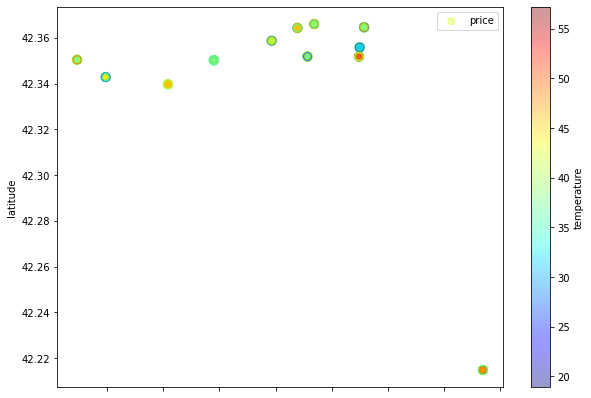

In [27]:
analysis_df.plot(kind="scatter", x="longitude", y="latitude",
    s=analysis_df['price'], label="price",
    c="temperature", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

# Price Analysis

In [28]:
import plotly.figure_factory as ff

We will work with a set of samplesin these analysis.

In [29]:
import random
random.seed(100)

In [30]:
viz_df = analysis_df.sample(frac =.25)


In [31]:
fig = ff.create_distplot([viz_df["price"].dropna().values.tolist()], group_labels=['distplot'])
fig.show()

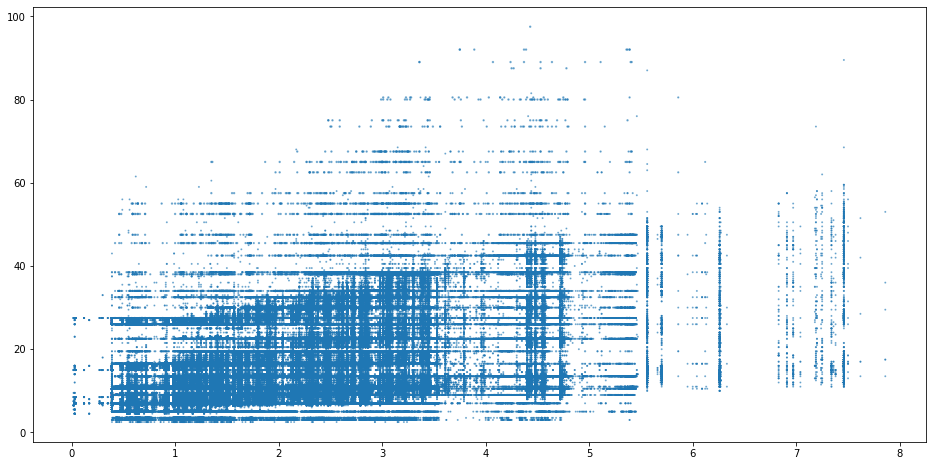

In [32]:
plt.figure(figsize=(16,8))
plt.scatter(x=analysis_df["distance"], y=analysis_df["price"], s=analysis_df["surge_multiplier"], alpha=0.5)
plt.show()

see a special scatter plot to visualize the different effect of surging

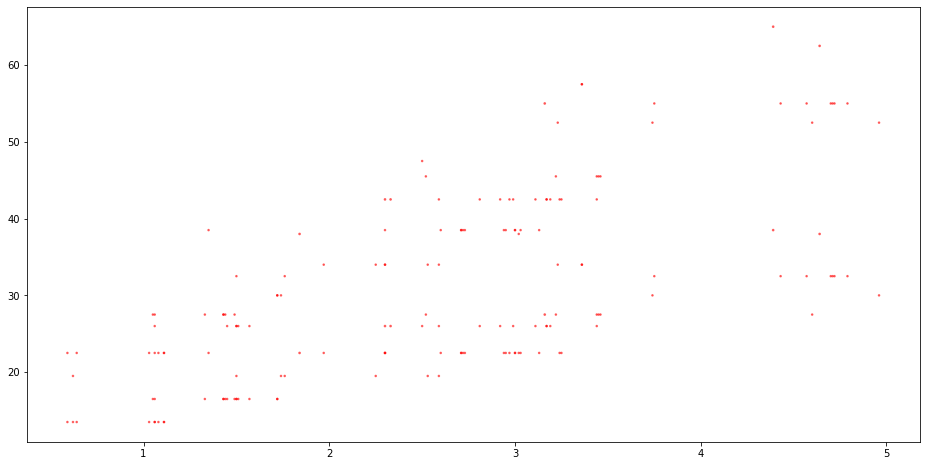

In [33]:
surge_data = analysis_df[analysis_df["surge_multiplier"]>2.0]
plt.figure(figsize=(16,8))
plt.scatter(x=surge_data["distance"], y=surge_data["price"], marker='o', c='r',s=surge_data["surge_multiplier"], alpha=0.5)
plt.show()

# Visualization of Corelation

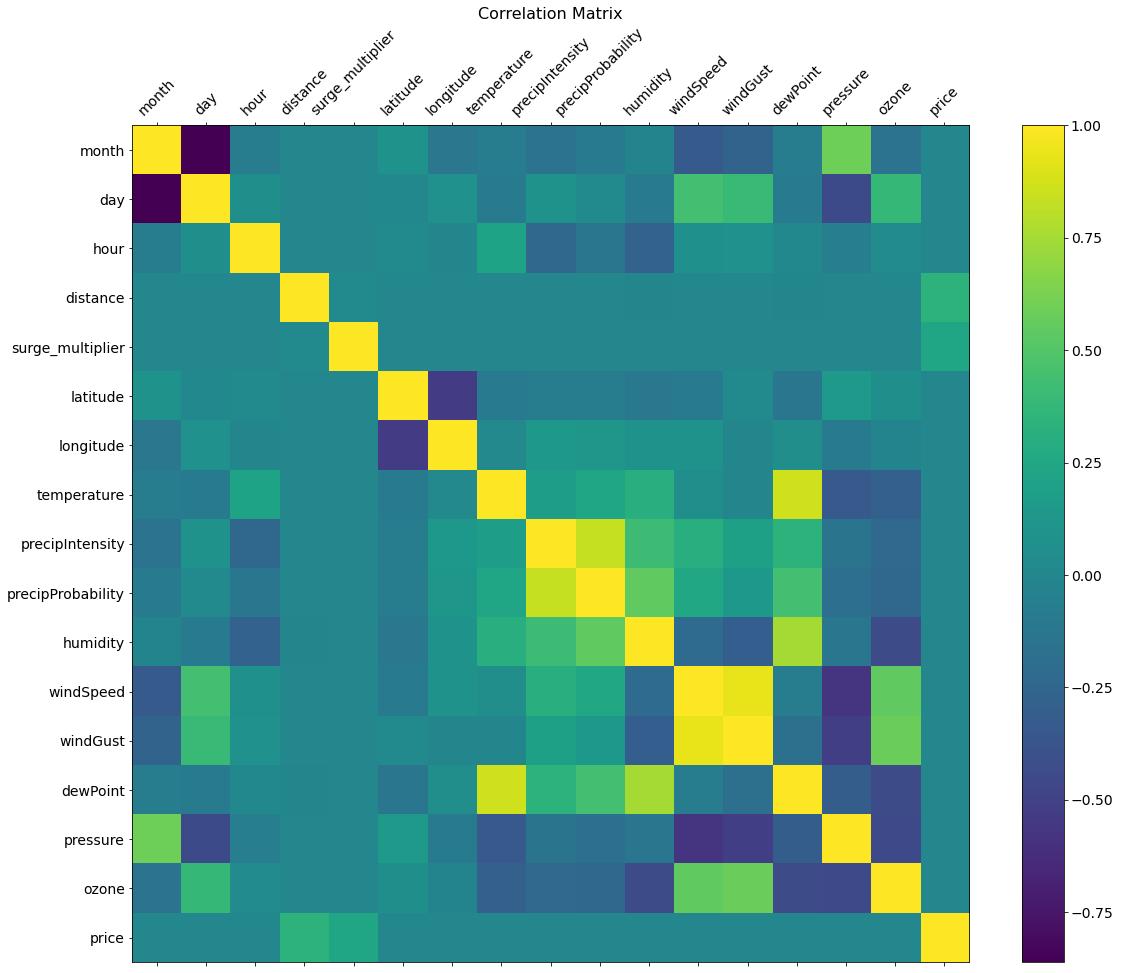

In [34]:
f = plt.figure(figsize=(19, 15))
plt.matshow(analysis_df.corr(), fignum=f.number)
plt.xticks(range(analysis_df.select_dtypes(['number']).shape[1]), analysis_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(analysis_df.select_dtypes(['number']).shape[1]), analysis_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

Inference:

## Linear Model


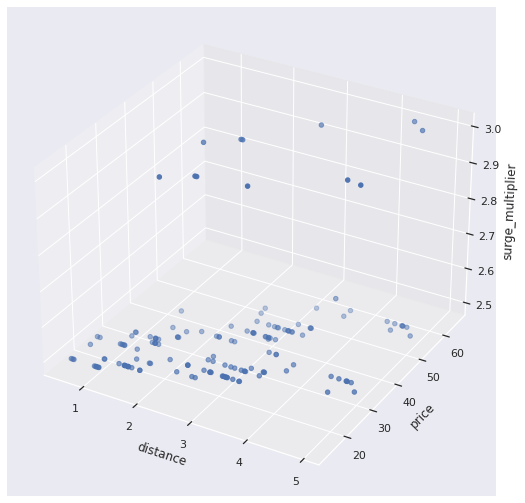

In [35]:
import seaborn as sns
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection = '3d')

x = surge_data['distance']
y = surge_data['price']
z = surge_data['surge_multiplier']

ax.set_xlabel("distance")
ax.set_ylabel("price")
ax.set_zlabel("surge_multiplier")

ax.scatter(x, y, z)

plt.show()

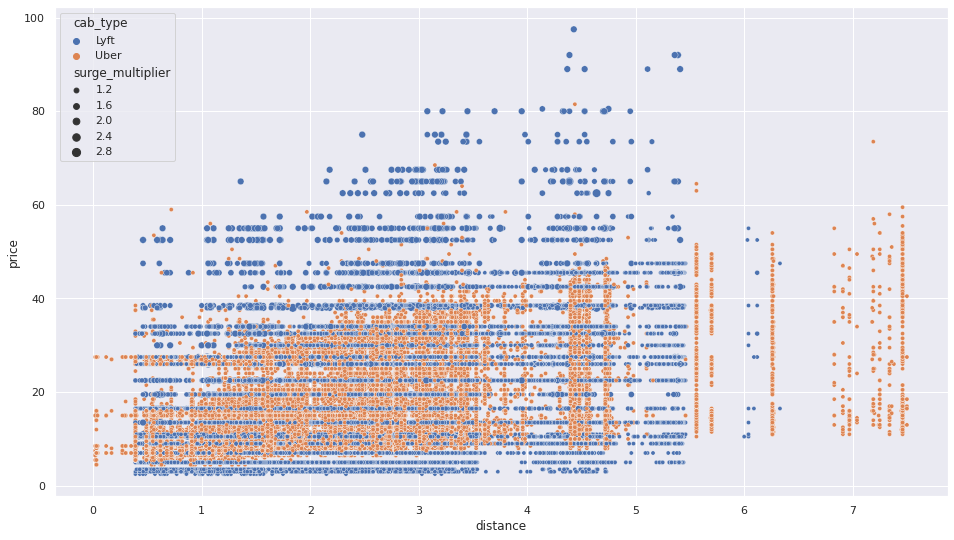

In [36]:
df = analysis_df[(analysis_df["hour"]>=22) | (analysis_df["hour"]<=4)]
plt.figure(figsize=(16,9))
sns.scatterplot(data = df, x = "distance",
                y = "price", hue = "cab_type", size = "surge_multiplier")
plt.show()

Inference:

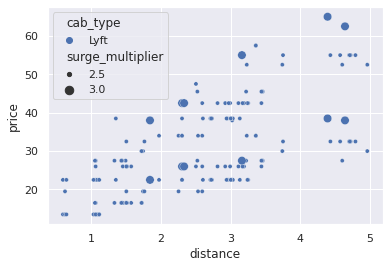

In [37]:

sns.scatterplot(data = surge_data, x = "distance",
                y = "price", hue = "cab_type", size = "surge_multiplier")
plt.show()

In [38]:
linear_df = analysis_df[["distance","surge_multiplier","price"]]

In [39]:
linear_df.dropna(inplace = True)

In [40]:
#separate the other attributes from the predicting attribute
x = linear_df.drop("price",axis=1)
#separte the predicting attribute into Y for model training 
y = linear_df["price"]

In [41]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [42]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [43]:
y_prediction =  LR.predict(x_test)

In [44]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.17502695205749397
mean_sqrd_error is== 71.92149895182435
root_mean_squared error of is== 8.48065439407976


In [45]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                 6.659e+04
Date:                Thu, 16 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:17:34   Log-Likelihood:            -2.2691e+06
No. Observations:              637976   AIC:                         4.538e+06
Df Residuals:                  637973   BIC:                         4.538e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -12.5290      0.115  

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [46]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2021-09-16 00:17:35.603056: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-16 00:17:35.603772: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.4.1


In [47]:
train_dataset = linear_df.sample(frac=0.8, random_state=0)
test_dataset = linear_df.drop(train_dataset.index)

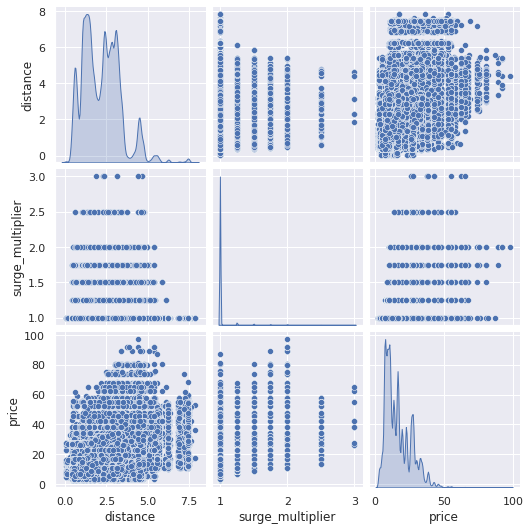

In [48]:
import seaborn as sns
sns.pairplot(train_dataset,diag_kind='kde')

In [49]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

In [50]:
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

2021-09-16 00:18:01.960409: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-16 00:18:01.963746: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-16 00:18:01.963788: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-16 00:18:01.963825: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (013868cca75d): /proc/driver/nvidia/version does not exist
2021-09-16 00:18:01.966371: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

[2.1897442 1.0150491]


In [51]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [52]:
linear_model.predict(train_features[:10])

2021-09-16 00:18:03.370343: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-16 00:18:03.384699: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2299995000 Hz


array([[ 0.18767928],
       [-0.08011357],
       [ 0.28124544],
       [ 0.14250937],
       [ 0.2586605 ],
       [ 0.09572628],
       [ 0.92814255],
       [ 0.28124544],
       [ 0.01667902],
       [-0.0333305 ]], dtype=float32)

In [53]:
linear_model.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.18323529],
       [-0.99428666]], dtype=float32)>

In [54]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [55]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=10,
    # suppress logging
    verbose=2,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/10
12760/12760 - 12s - loss: 6.8687 - val_loss: 6.8225
Epoch 2/10
12760/12760 - 10s - loss: 6.8240 - val_loss: 6.8507
Epoch 3/10
12760/12760 - 10s - loss: 6.8249 - val_loss: 6.8157
Epoch 4/10
12760/12760 - 10s - loss: 6.8256 - val_loss: 6.8120
Epoch 5/10
12760/12760 - 10s - loss: 6.8240 - val_loss: 6.8141
Epoch 6/10
12760/12760 - 10s - loss: 6.8244 - val_loss: 6.8221
Epoch 7/10
12760/12760 - 11s - loss: 6.8243 - val_loss: 6.8365
Epoch 8/10
12760/12760 - 10s - loss: 6.8248 - val_loss: 6.8135
Epoch 9/10
12760/12760 - 10s - loss: 6.8241 - val_loss: 6.8141
Epoch 10/10
12760/12760 - 11s - loss: 6.8245 - val_loss: 6.8266
CPU times: user 2min 15s, sys: 20.4 s, total: 2min 35s
Wall time: 1min 45s


In [56]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss  val_loss  epoch
5  6.824408  6.822132      5
6  6.824336  6.836487      6
7  6.824765  6.813533      7
8  6.824111  6.814138      8
9  6.824476  6.826552      9

In [57]:
import matplotlib.pyplot as plt
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

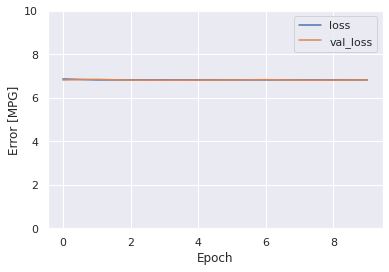

In [58]:
plot_loss(history)

In [59]:
def plot_data(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

In [60]:
!pip install pyspark

     |████████████████████████████████| 212.4 MB 53 kB/s 
     |████████████████████████████████| 198 kB 69.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=3944913cf6137cf3eecead4767d2922cc190ee2832ce411f7916293f3cf8c406
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


In [61]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
sc= SparkContext()
sqlContext = SQLContext(sc)
df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('../input/uber-and-lyft-dataset-boston-ma/rideshare_kaggle.csv')
df.take(1)

21/09/16 00:20:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/09/16 00:20:45 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


[Row(id='424553bb-7174-41ea-aeb4-fe06d4f4b9d7', timestamp=1544952607.89, hour=9, day=16, month=12, datetime='2018-12-16 09:30:07', timezone='America/New_York', source='Haymarket Square', destination='North Station', cab_type='Lyft', product_id='lyft_line', name='Shared', price='5', distance=0.44, surge_multiplier=1.0, latitude=42.2148, longitude=-71.033, temperature=42.34, apparentTemperature=37.12, short_summary=' Mostly Cloudy ', long_summary=' Rain throughout the day. ', precipIntensity=0.0, precipProbability=0.0, humidity=0.68, windSpeed=8.66, windGust=9.17, windGustTime=1545015600, visibility=10.0, temperatureHigh=43.68, temperatureHighTime=1544968800, temperatureLow=34.19, temperatureLowTime=1545048000, apparentTemperatureHigh=37.95, apparentTemperatureHighTime=1544968800, apparentTemperatureLow=27.39, apparentTemperatureLowTime=1545044400, icon=' partly-cloudy-night ', dewPoint=32.7, pressure=1021.98, windBearing=57, cloudCover=0.72, uvIndex=0, visibility.1=10.0, ozone=303.8, su

In [62]:
df.cache()
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- timestamp: double (nullable = true)
 |-- hour: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- datetime: string (nullable = true)
 |-- timezone: string (nullable = true)
 |-- source: string (nullable = true)
 |-- destination: string (nullable = true)
 |-- cab_type: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- price: string (nullable = true)
 |-- distance: double (nullable = true)
 |-- surge_multiplier: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- temperature: double (nullable = true)
 |-- apparentTemperature: double (nullable = true)
 |-- short_summary: string (nullable = true)
 |-- long_summary: string (nullable = true)
 |-- precipIntensity: double (nullable = true)
 |-- precipProbability: double (nullable = true)
 |-- humidity: double (nullable = true)
 |-- 

In [63]:
from pyspark.sql.types import IntegerType
df = df.withColumn("price", df["price"].cast(IntegerType()))

In [64]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ["distance","surge_multiplier"], outputCol = 'features')
vhouse_df = vectorAssembler.transform(df)
vhouse_df = vhouse_df.select(['features',"price"])
vhouse_df.show(3)

+----------+-----+
|  features|price|
+----------+-----+
|[0.44,1.0]|    5|
|[0.44,1.0]|   11|
|[0.44,1.0]|    7|
+----------+-----+
only showing top 3 rows



In [65]:
vhouse_df.printSchema()


root
 |-- features: vector (nullable = true)
 |-- price: integer (nullable = true)



In [66]:
splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [67]:
# from pyspark.ml.regression import LinearRegression
# lr = LinearRegression(featuresCol = 'features', labelCol="price", maxIter=10, regParam=0.3, elasticNetParam=0.8)
# lr_model = lr.fit(train_df)
# print("Coefficients: " + str(lr_model.coefficients))
# print("Intercept: " + str(lr_model.intercept))


Next Step add Apache Spark and explain the whole notebook.

# References:
## Books I am following:
* [Handbook of Regression Analysis](http://docentes.uto.edu.bo/jzamoranoe/wp-content/uploads/Chatterjee2013_Regresion.pdf)

* [Linear Regression Analysis](http://www.manalhelal.com/Books/geo/LinearRegressionAnalysisTheoryandComputing.pdf)

* [LINEAR MODELS IN
STATISTICS](http://www.utstat.toronto.edu/~brunner/books/LinearModelsInStatistics.pdf)

## Notes I am following:
* https://www.mit.edu/~6.s085/notes/lecture3.pdf
* http://web.nchu.edu.tw/~numerical/course1012/ra/Applied_Regression_Analysis_A_Research_Tool.pdf

* https://rufiismada.files.wordpress.com/2012/02/regression__linear_models_in_statistics.pdf

* http://www.stat.cmu.edu/~hseltman/309/Book/chapter9.pdf
* https://www.coursera.org/learn/machine-learning/home/week/2




# Profiles of The Authors
* [SAMPRIT CHATTERJEE](http://people.stern.nyu.edu/schatter/cv8psc.htm)